In [1]:
!jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 75% -T

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('scroll_down/main')
utils.load_extension('hide_input/main')
utils.load_extension('jupyter-js-widgets/extension')


<IPython.core.display.Javascript object>

# External Tools

In [3]:
!pip install tensorflow --ignore-installed
!pip3 show tensorflow

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached protobuf-3.15.8-py2.py3-none-any.whl (173 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Processing c:\users\rohaa\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
Processing c:\users\rohaa\appdata\local\pip\

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\six.py'
Consider using the `--user` option or check the permissions.




  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
  Using cached setuptools-56.0.0-py3-none-any.whl (784 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached cachetools-4.2.1-py3-none-any.whl (12 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.26.4-py2.py3-none-any.whl (153 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached oauthlib-3.1.0-

## Libraries

In [51]:
import pandas as pd # for dataFrames
from pandas_profiling import ProfileReport# For EDA

import os # for system functions
import numpy as np # for linear algebra


# for visiualization
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight") 
import seaborn as sns 

# for dummy encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

from category_encoders.one_hot import OneHotEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.cat_boost import CatBoostEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelBinarizer
from sklearn.metrics import mean_absolute_error, classification_report, roc_auc_score

from sklearn.tree import DecisionTreeRegressor, plot_tree
from catboost import CatBoostRegressor, CatBoostClassifier

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

import shap

from matplotlib import rcParams

rcParams["axes.labelsize"] = 14
rcParams["xtick.labelsize"] = 12
rcParams["ytick.labelsize"] = 12

rcParams["figure.figsize"] = 16, 8

## Data

In [5]:
file_path =  os.path.abspath(os.path.join('' ,"../..")) + '/Data/DHS-PROCESSED-CLEAN.csv'

In [6]:
df = pd.read_csv(file_path)

In [7]:
# No clue why Carlos wrote this line
#dhs.join(osm,on='cluster??')

# Function Definitions

In [8]:
def plot_feature_importance(columnas,model_features,columns_ploted=10,model_name='Catboost'):
    '''
    This method is yet non-tested
    
    This function receives a set of columns feeded to a model, and the importance of each of feature.
    Returns a graphical visualization
    
    Call it fot catboost pipe example:
    plot_feature_importance(pipe_best_estimator[:-1].transform(X_tr).columns,pipe_best_estimator.named_steps['cb'].get_feature_importance(),20)
    
    Call it for lasso pipe example:
    plot_feature_importance(pipe_best_estimator[:-1].transform(X_tr).columns,np.array(pipe_best_estimator.named_steps['clf'].coef_.squeeze()),20)
    '''

    feature_importance = pd.Series(index = columnas, data = np.abs(model_features))
    n_selected_features = (feature_importance>0).sum()
    print('{0:d} features, reduction of {1:2.2f}%'.format(n_selected_features,(1-n_selected_features/len(feature_importance))*100))
    plt.figure()
    feature_importance.sort_values().tail(columns_ploted).plot(kind = 'bar', figsize = (18,6))
    plt.title('Feature Importance for {}'.format(model_name))
    plt.show()


In [9]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

# EDA

In [10]:
# create profile
profile = ProfileReport(df, title="Pandas Profiling Report")

# save file
profile.to_file("DHS_EDA_report.html")

# uncomment to read the profile here
#profile

## Modeling

In [11]:
# columns to drop
cols_drop = [
    "DHSCLUST",
    "Wealth",
    "Wealth Index",
    "ADM1NAME",
    "LATNUM",
    "LONGNUM",
    "geometry",
    "DHSREGNA",
    "UN_Population_Density_2015",
]

# Scale the population
scaler = MinMaxScaler() # Standard scaler scales to a normal distribution hence replaced
df[["UN_Population_Density_2015"]] = scaler.fit_transform(
    df[["UN_Population_Density_2015"]]
)

# drop columns
X = df.drop(columns=cols_drop)

# seperate target 
y = df[["Wealth Index"]]

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


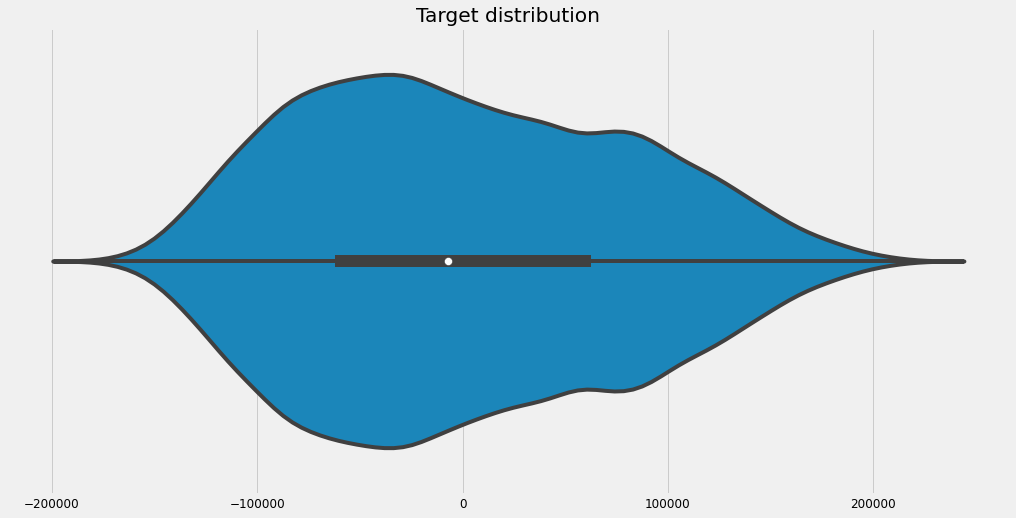

In [12]:
plt.figure()
plt.title('Target distribution')
sns.violinplot(y.values)
plt.show()

In [13]:
X.columns

Index(['Toilet Facility', 'Roof Material', 'Electricity', 'Cooking Fuel',
       'Drinking Water', 'URBAN_RURA', 'Population_Density'],
      dtype='object')

In [14]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y)

### Regression

#### Linear OHE

In [15]:
model = Lasso() # regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.
enc = OneHotEncoder(use_cat_names=True) 

# pipeline to join the stages
pipe = Pipeline([('enc',enc), ('model',model)]) 
pipe.fit(X_tr,y_tr)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3738737137749.0215, tolerance: 13377312195.010872


Pipeline(steps=[('enc',
                 OneHotEncoder(cols=['Toilet Facility', 'Roof Material',
                                     'Electricity', 'Cooking Fuel',
                                     'Drinking Water', 'URBAN_RURA',
                                     'Population_Density'],
                               use_cat_names=True)),
                ('model', Lasso())])

In [16]:
# Pipeline performance
mean_absolute_error(pipe.predict(X_te),y_te)

27638.585038397912

40 features, reduction of 6.98%


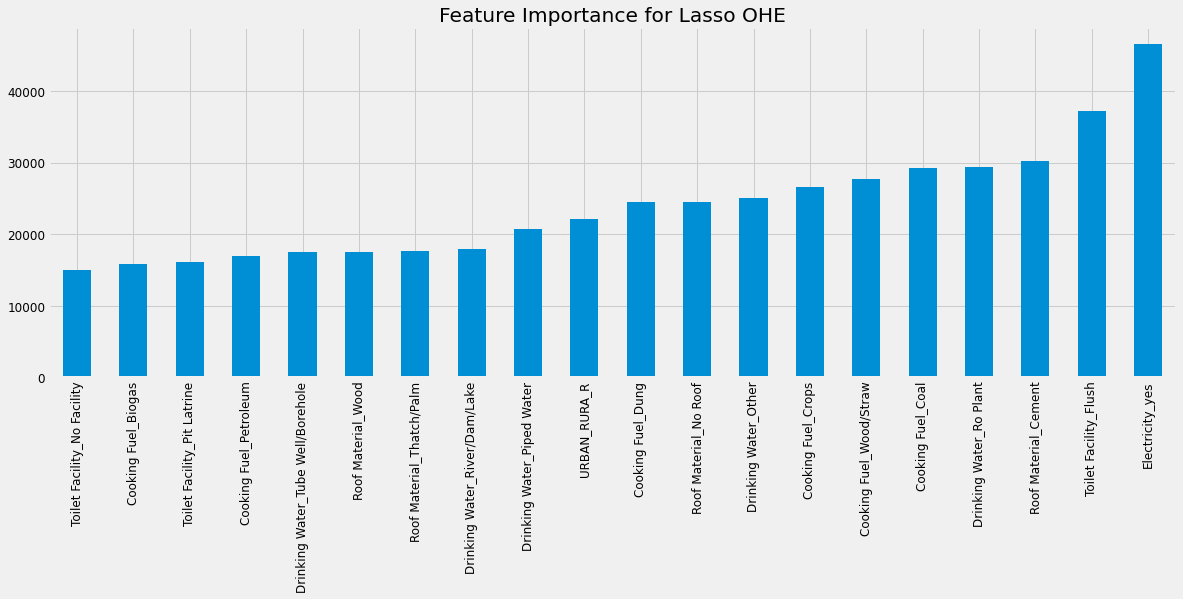

In [17]:
# which columns influenced the most 
# this information allows for faster training, better explainability 
# and reduces complexity
plot_feature_importance(
    pipe[:-1].transform(X_tr).columns,
    np.array(pipe.named_steps["model"].coef_.squeeze()),
    20,model_name='Lasso OHE'
)

#### Linear TE


In [18]:
model = Lasso()

# CatBoost encoding assigns values as per target
enc = CatBoostEncoder()

pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

Pipeline(steps=[('enc',
                 CatBoostEncoder(cols=['Toilet Facility', 'Roof Material',
                                       'Electricity', 'Cooking Fuel',
                                       'Drinking Water', 'URBAN_RURA',
                                       'Population_Density'])),
                ('model', Lasso())])

In [19]:
mean_absolute_error(pipe.predict(X_te),y_te)

28267.662143023812

MAE increased so OHE performs better

7 features, reduction of 0.00%


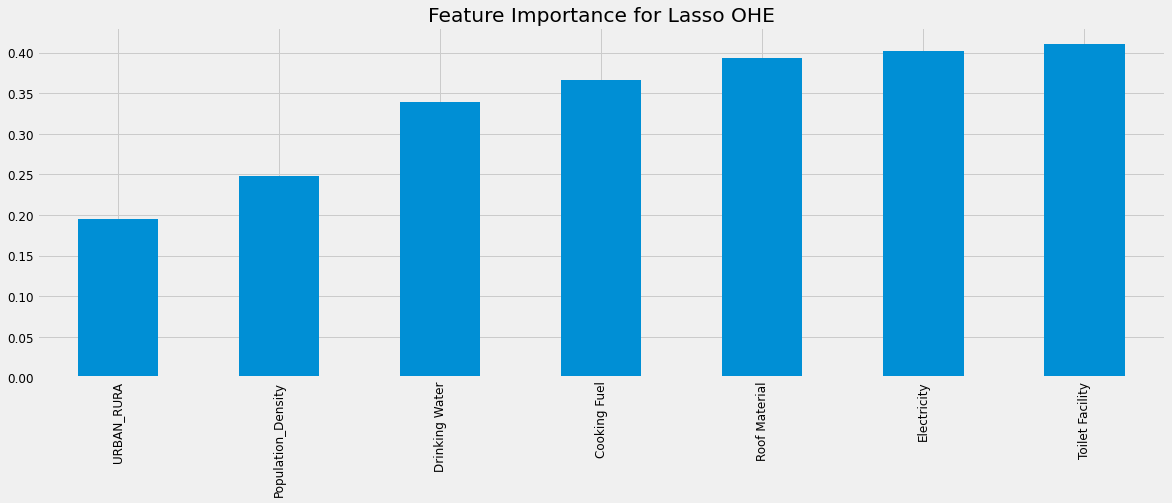

In [20]:
plot_feature_importance(
    pipe[:-1].transform(X_tr).columns,
    np.array(pipe.named_steps["model"].coef_.squeeze()),
    20,model_name='Lasso OHE'
)

Only 7 features so a faster model 

#### Decision Tree TE

In [21]:
model = DecisionTreeRegressor(max_depth=5)
enc = CatBoostEncoder()

pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

Pipeline(steps=[('enc',
                 CatBoostEncoder(cols=['Toilet Facility', 'Roof Material',
                                       'Electricity', 'Cooking Fuel',
                                       'Drinking Water', 'URBAN_RURA',
                                       'Population_Density'])),
                ('model', DecisionTreeRegressor(max_depth=5))])

In [22]:
mean_absolute_error(pipe.predict(X_te),y_te)

28096.050199259098

MAE greater than Linear OHE but less than Linear TE

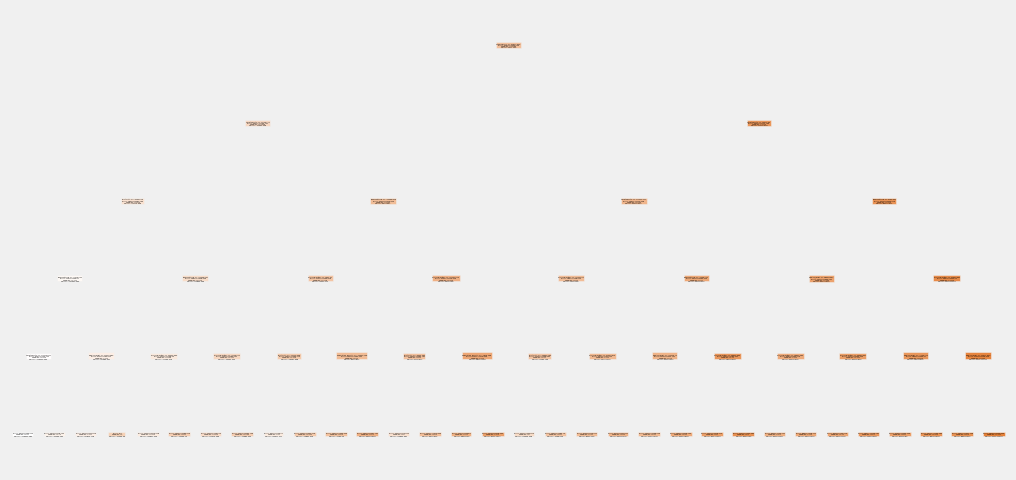

In [23]:
plt.figure()
plot_tree(
    pipe.named_steps["model"],
    max_depth=5,
    feature_names=X_tr.columns,
    filled=True,
)
plt.savefig('tree_te.svg',format='svg')
plt.show()

#### Decision Tree OHE

In [24]:
model = DecisionTreeRegressor(max_depth=8)
enc = OneHotEncoder()
pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


Pipeline(steps=[('enc',
                 OneHotEncoder(cols=['Toilet Facility', 'Roof Material',
                                     'Electricity', 'Cooking Fuel',
                                     'Drinking Water', 'URBAN_RURA',
                                     'Population_Density'])),
                ('model', DecisionTreeRegressor(max_depth=8))])

In [25]:
mean_absolute_error(pipe.predict(X_te),y_te)

26523.034171943527

Best MAE so far!

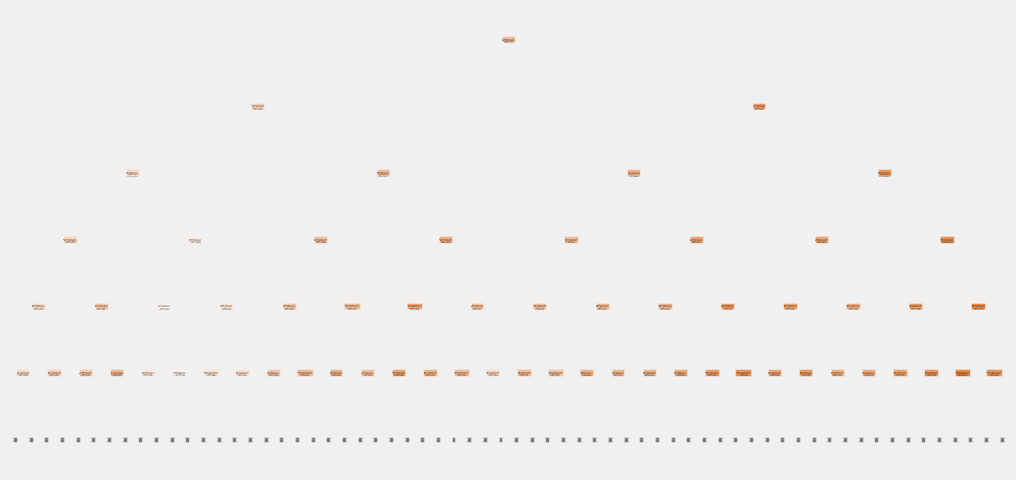

In [26]:
plt.figure()
plot_tree(
    pipe.named_steps["model"],
    max_depth=5,
    feature_names=pipe[:-1].transform(X_tr).columns,
    filled=True,
)
plt.savefig('tree_ohe.svg',format='svg')
plt.show()

#### Catboost TE

In [27]:
model = CatBoostRegressor(iterations=200,verbose=0)
enc = CatBoostEncoder()
pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

Pipeline(steps=[('enc',
                 CatBoostEncoder(cols=['Toilet Facility', 'Roof Material',
                                       'Electricity', 'Cooking Fuel',
                                       'Drinking Water', 'URBAN_RURA',
                                       'Population_Density'])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000002C0811CD940>)])

In [28]:
mean_absolute_error(pipe.predict(X_te),y_te)

26392.809580623423

Best MAE so far!

7 features, reduction of 0.00%


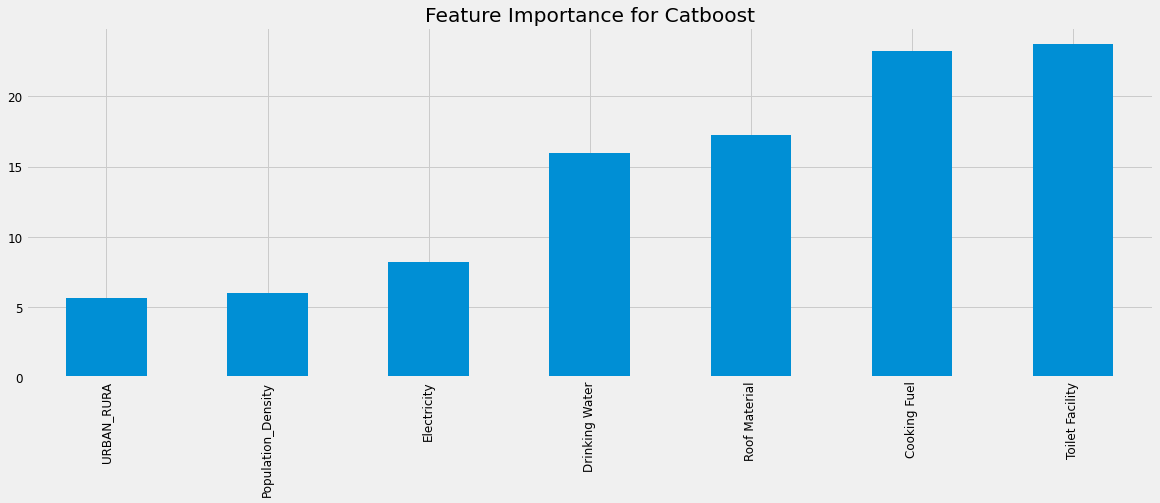

In [29]:
plot_feature_importance(
    pipe[:-1].transform(X_tr).columns,
    pipe.named_steps["model"].get_feature_importance(),
    20,
)

In [30]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(pipe.named_steps["model"])
shap_values = explainer.shap_values(pipe[:-1].transform(X_tr))

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

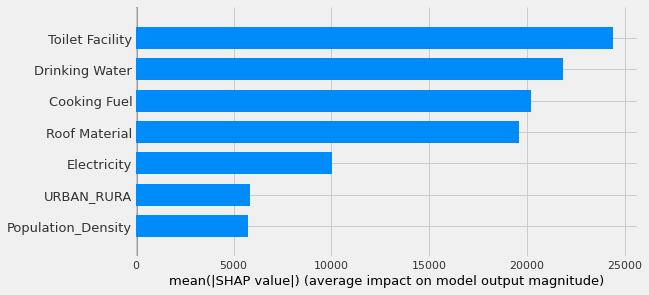

In [31]:
shap.summary_plot(shap_values, X_te, plot_type="bar")

#### Neural Network OHE

In [43]:
#X_tr.shape
X_tr.head()

,Toilet Facility,Roof Material,Electricity,Cooking Fuel,Drinking Water,URBAN_RURA,Population_Density
814,Flush,Metal,yes,Petroleum,Public Tap,U,Very Low
22298,No Facility,Thatch/Palm,yes,Wood/Straw,Public Tap,R,High
24860,Flush,Cement,yes,Petroleum,Piped Water,U,Very High
9515,No Facility,Others,no,Wood/Straw,Spring,R,Low
15560,Pit Latrine,Metal,yes,Wood/Straw,River/Dam/Lake,R,Average


In [47]:
y_tr.head()

814      2
22298    4
24860    1
9515     5
15560    4
Name: Wealth, dtype: int64

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


Minimum Validation Loss: 0.5483


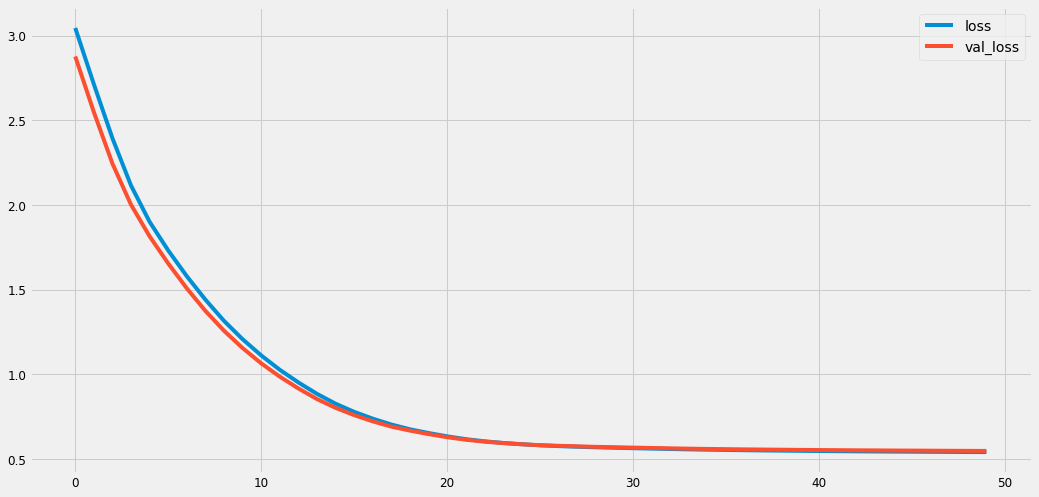

In [52]:
from sklearn.compose import make_column_transformer

features_cat = ['Toilet Facility', 'Roof Material', 'Electricity', 'Cooking Fuel', 'Drinking Water', 'URBAN_RURA', 
                'Population_Density']

preprocessor = make_column_transformer(
    (OneHotEncoder(), features_cat),
)

X_train = preprocessor.fit_transform(X_tr)
X_valid = preprocessor.transform(X_te)

input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_tr,
    validation_data=(X_valid, y_te),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Final part of training hard to see, so starting at epoch 12 instead:

Minimum Validation Loss: 0.5483


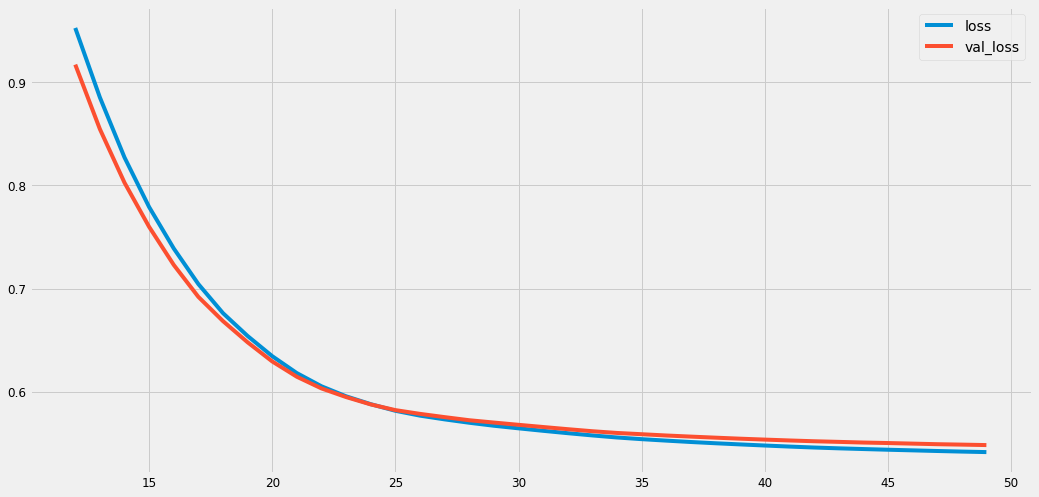

In [53]:
# Start the plot at epoch 12
history_df.loc[12:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Validation loss eventually increases so probably slight overfitting 

Epoch 1/50
42/42 [==============================] - 1s 11ms/step - loss: 1.9136 - val_loss: 0.5713
Epoch 2/50
42/42 [==============================] - 0s 5ms/step - loss: 0.5406 - val_loss: 0.5170
Epoch 3/50
42/42 [==============================] - 0s 5ms/step - loss: 0.5048 - val_loss: 0.4992
Epoch 4/50
42/42 [==============================] - 0s 5ms/step - loss: 0.4890 - val_loss: 0.4914
Epoch 5/50
42/42 [==============================] - 0s 5ms/step - loss: 0.4838 - val_loss: 0.4859
Epoch 6/50
42/42 [==============================] - 0s 5ms/step - loss: 0.4744 - val_loss: 0.4841
Epoch 7/50
42/42 [==============================] - 0s 5ms/step - loss: 0.4662 - val_loss: 0.4784
Epoch 8/50
42/42 [==============================] - 0s 5ms/step - loss: 0.4681 - val_loss: 0.4749
Epoch 9/50
42/42 [==============================] - 0s 5ms/step - loss: 0.4650 - val_loss: 0.4756
Epoch 10/50
42/42 [==============================] - 0s 5ms/step - loss: 0.4577 - val_loss: 0.4727
Epoch 11/50
42/42 

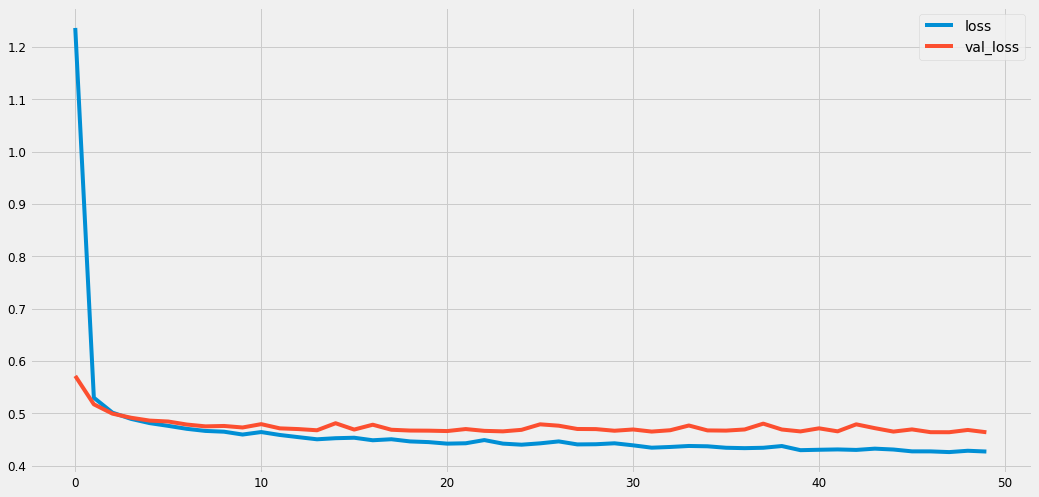

In [56]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_tr,
    validation_data=(X_valid, y_te),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

overfitting!

Epoch 1/50
42/42 - 1s - loss: 1.7366 - mean_absolute_error: 1.7366 - val_loss: 0.6189 - val_mean_absolute_error: 0.6189
Epoch 2/50
42/42 - 0s - loss: 0.5555 - mean_absolute_error: 0.5555 - val_loss: 0.5361 - val_mean_absolute_error: 0.5361
Epoch 3/50
42/42 - 0s - loss: 0.5191 - mean_absolute_error: 0.5191 - val_loss: 0.5190 - val_mean_absolute_error: 0.5190
Epoch 4/50
42/42 - 0s - loss: 0.5043 - mean_absolute_error: 0.5043 - val_loss: 0.5060 - val_mean_absolute_error: 0.5060
Epoch 5/50
42/42 - 0s - loss: 0.4934 - mean_absolute_error: 0.4934 - val_loss: 0.4988 - val_mean_absolute_error: 0.4988
Epoch 6/50
42/42 - 0s - loss: 0.4862 - mean_absolute_error: 0.4862 - val_loss: 0.4926 - val_mean_absolute_error: 0.4926
Epoch 7/50
42/42 - 0s - loss: 0.4796 - mean_absolute_error: 0.4796 - val_loss: 0.4889 - val_mean_absolute_error: 0.4889
Epoch 8/50
42/42 - 0s - loss: 0.4754 - mean_absolute_error: 0.4754 - val_loss: 0.4861 - val_mean_absolute_error: 0.4861
Epoch 9/50
42/42 - 0s - loss: 0.4710 - m

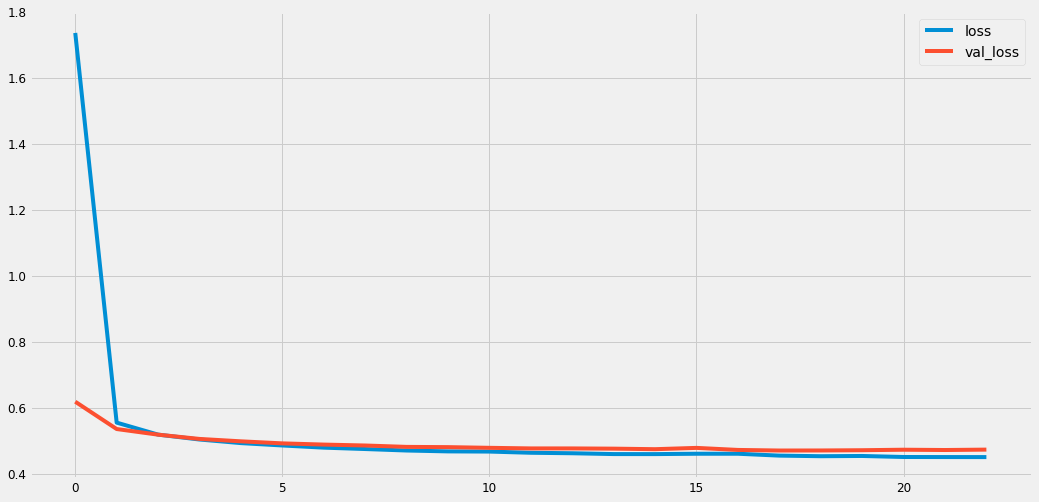

In [71]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001,
                                         patience = 5,
                                         restore_best_weights = True
                                         )

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mean_absolute_error']
)
history = model.fit(
    X_train, y_tr,
    validation_data=(X_valid, y_te),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping],
    verbose = 2
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

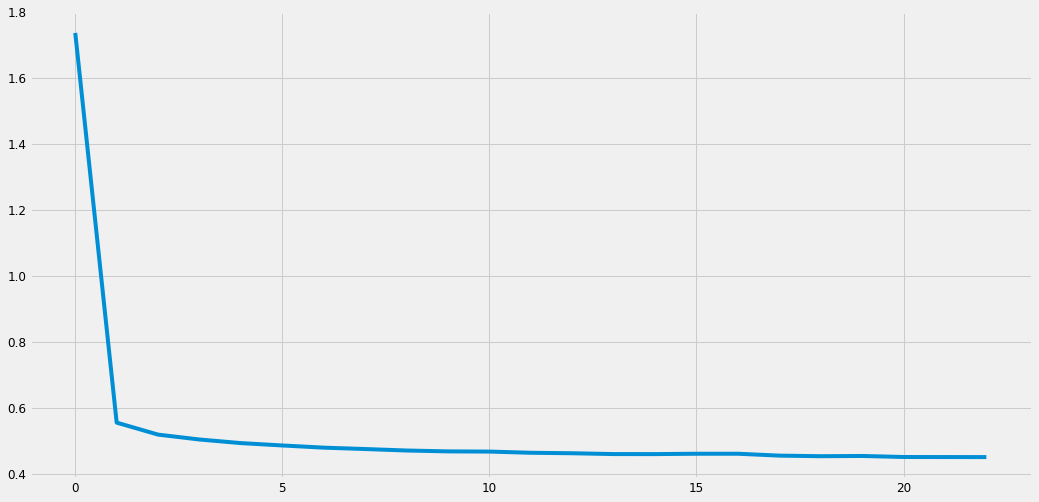

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_error'])

Experimenting with batch normalization & more nodes

Epoch 1/100
426/426 [==============================] - 5s 8ms/step - loss: 1.6400 - mae: 1.6400 - val_loss: 0.6398 - val_mae: 0.6398
Epoch 2/100
426/426 [==============================] - 3s 7ms/step - loss: 0.6719 - mae: 0.6719 - val_loss: 0.7506 - val_mae: 0.7506
Epoch 3/100
426/426 [==============================] - 3s 7ms/step - loss: 0.6179 - mae: 0.6179 - val_loss: 0.6248 - val_mae: 0.6248
Epoch 4/100
426/426 [==============================] - 3s 7ms/step - loss: 0.5941 - mae: 0.5941 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 5/100
426/426 [==============================] - 3s 7ms/step - loss: 0.5759 - mae: 0.5759 - val_loss: 0.5750 - val_mae: 0.5750
Epoch 6/100
426/426 [==============================] - 3s 7ms/step - loss: 0.5684 - mae: 0.5684 - val_loss: 0.6635 - val_mae: 0.6635
Epoch 7/100
426/426 [==============================] - 3s 7ms/step - loss: 0.5637 - mae: 0.5637 - val_loss: 0.5776 - val_mae: 0.5776
Epoch 8/100
426/426 [==============================] - 3s 8ms/step - 

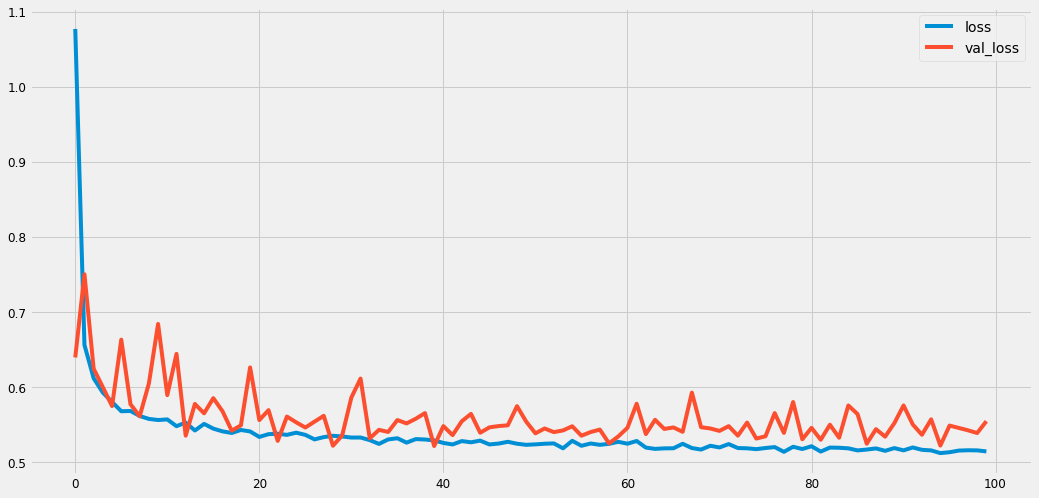

In [73]:

model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_tr,
    validation_data=(X_valid, y_te),
    batch_size=50,
    epochs=EPOCHS,
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Not better, returning to previous model

## Classification

In [33]:
X = df.drop(columns=cols_drop)
y = df[["Wealth"]]

dic = {"richest": 1, "richer": 2, "middle": 3, "poorer": 4, "poorest": 5}
y = y.Wealth.map(dic)

X_tr,X_te,y_tr,y_te = train_test_split(X,y)

#### Catboost TE

In [34]:
model = CatBoostRegressor(iterations=200,verbose=0)
enc = CatBoostEncoder()
pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

Pipeline(steps=[('enc',
                 CatBoostEncoder(cols=['Toilet Facility', 'Roof Material',
                                       'Electricity', 'Cooking Fuel',
                                       'Drinking Water', 'URBAN_RURA',
                                       'Population_Density'])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000002C0FD1E1880>)])

In [35]:
mean_absolute_error(pipe.predict(X_te),y_te)

0.5432305518077299

In [36]:
preds = np.round(pipe.predict(X_te))
dic_rev = {v: k for k, v in dic.items()}
preds = pd.DataFrame(preds,columns=['predictions'])
y_test = preds.predictions.map(dic_rev)

In [37]:
print(classification_report(y_test,[dic_rev[k] for k in y_te]))

              precision    recall  f1-score   support

      middle       0.41      0.45      0.43      1181
      poorer       0.57      0.46      0.51      1844
     poorest       0.66      0.80      0.72      1581
      richer       0.59      0.45      0.51      1528
     richest       0.56      0.74      0.64       962

    accuracy                           0.57      7096
   macro avg       0.56      0.58      0.56      7096
weighted avg       0.57      0.57      0.56      7096



In [38]:
multiclass_roc_auc_score(y_test,[dic_rev[k] for k in y_te],average=None)

array([0.6604815 , 0.66842608, 0.83923765, 0.68330437, 0.82391557])

7 features, reduction of 0.00%


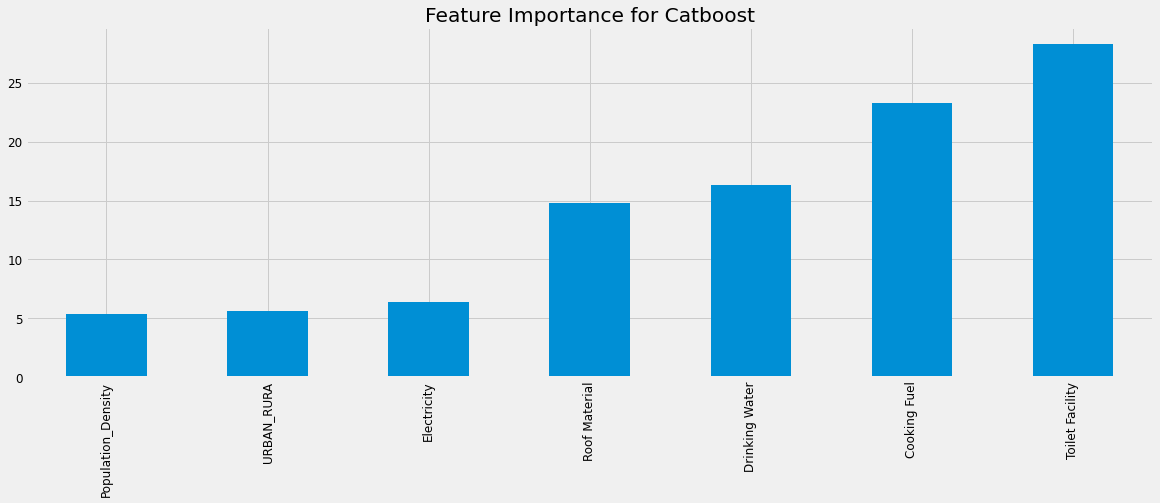

In [39]:
plot_feature_importance(
    pipe[:-1].transform(X_tr).columns,
    pipe.named_steps["model"].get_feature_importance(),
    20,
)

In [40]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(pipe.named_steps["model"])
shap_values = explainer.shap_values(pipe[:-1].transform(X_tr))

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

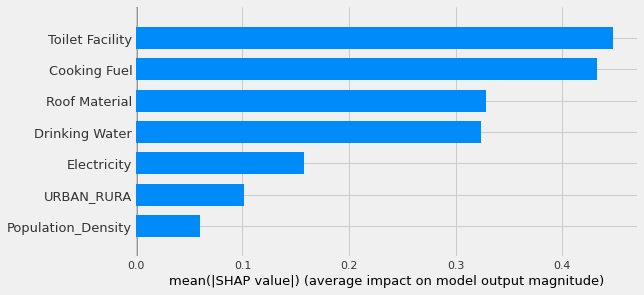

In [41]:
shap.summary_plot(shap_values, X_te, plot_type="bar")

## Best Performing Models:

| Approach | Mean Absolute Error |
|:--------:|:-------------------:|
| Linear Regression With One Hot Encoding | 27638.585 |
| Linear Lasso Regression With Catboost Encoder | 28267.662 |
| Decision Tree Regression (depth = 5) <br> With CatBoost Encoder | 28096.050 |
| Decision Tree Regression (depth = 8) <br> With One Hot Encoding | 26523.034 | 
| CatBoost Regression With CatBoost Encoder | 26392.809 |
